Resources:

https://www.gaussianwaves.com/2020/07/bpsk-python-matlab-bit-error-rate-simulation/

https://www.gaussianwaves.com/2015/06/how-to-generate-awgn-noise-in-matlaboctave-without-using-in-built-awgn-function/

Use pip to installed required packages:

In [80]:
! pip install numpy matplotlib

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def num_bits_per_symbol(M):
    """
    Compute the number of bits per symbol e.g. if M = 8, then k = 3
    """
    k = np.log2(M)
    return k

In [83]:
def compute_M_PSK_constellation(M, A):
    """
    M : Number of symbols in the constellation e.g. M=2 for BPSK
    A : Amplitude
    """
    constellation_points = []
    for m in range(0,M):
        constellation_points.append(np.array([
            A*np.cos(m/M*2.0*np.pi),  # in-phase component,   I
            A*np.sin(m/M*2.0*np.pi)   # quadrature component, Q
        ]))
    constellation = np.asarray(constellation_points)

    constellation_lookup_table = {}
    for m in range(0,M):
        print(type(m))
        constellation_lookup_table[m] = np.binary_repr(m, width=int(num_bits_per_symbol(M)))

    return constellation, constellation_lookup_table


Try the constellation computation:

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
{0: '00', 1: '01', 2: '10', 3: '11'}


Text(0, 0.5, 'Q, quadrature')

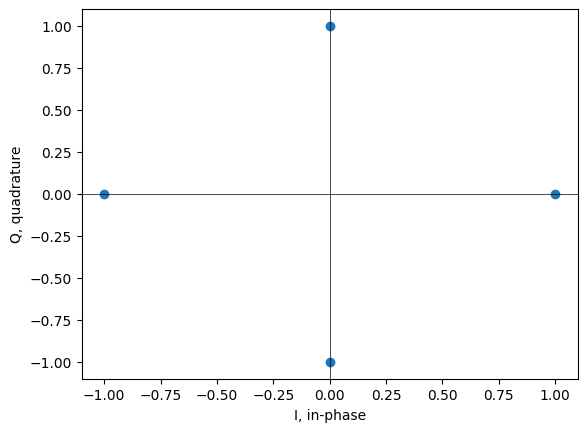

In [84]:
M4_constellation, M4_constellation_table = compute_M_PSK_constellation(4, 1)
print(M4_constellation_table)
plt.scatter(M4_constellation[:, 0], M4_constellation[:, 1])
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.xlabel("I, in-phase")
plt.ylabel("Q, quadrature")

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


Text(0, 0.5, 'Q, quadrature')

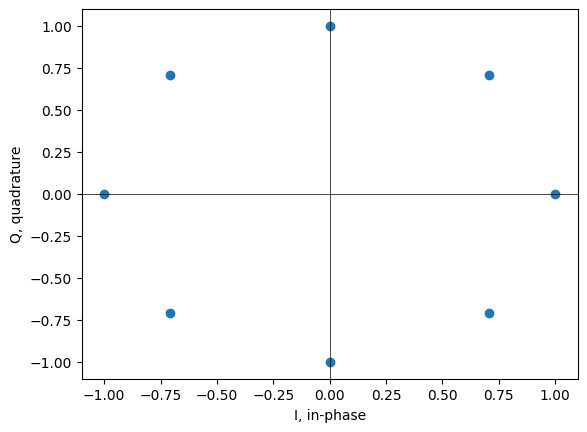

In [85]:
M8_constellation, M8_constellation_table = compute_M_PSK_constellation(8, 1)
plt.scatter(M8_constellation[:, 0], M8_constellation[:, 1])
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)
plt.xlabel("I, in-phase")
plt.ylabel("Q, quadrature")

In [86]:
def convert_binary_array_to_decimal(array_in):
    num_bits = np.shape(array_in)[-1]
    two_powers = []
    for i in range(num_bits, 0, -1):
        two_powers.append(2**(i-1))
    two_powers = np.asarray(two_powers)
    decimal = array_in.dot(two_powers)
    decimal = decimal.astype(int)
    return(decimal)


In [87]:
print(convert_binary_array_to_decimal(np.array([1,0,1])))

5


In [88]:
def modulate(bit_sequence, constellation, M):
    # Divide the bit_sequence into batches each of size k
    # Map the bit batches to the constellation
    k = num_bits_per_symbol(M)
    batches = np.split(bit_sequence, np.shape(bit_sequence)[-1]/k) # risky
    print("batches = \n", batches)
    batches = np.asarray(batches)
    print("batches (as array) = \n", batches)
    decimals = convert_binary_array_to_decimal(batches)
    print("decimal = \n", decimals)
    print("constellation = \n", constellation)
    signal = constellation[decimals]
    print("signal = \n", signal)
    return None

In [89]:
modulate(np.array([1,0,0,1,1,1]), M8_constellation, 8)

batches = 
 [array([1, 0, 0]), array([1, 1, 1])]
batches (as array) = 
 [[1 0 0]
 [1 1 1]]
decimal = 
 [4 7]
constellation = 
 [[ 1.00000000e+00  0.00000000e+00]
 [ 7.07106781e-01  7.07106781e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-7.07106781e-01  7.07106781e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-7.07106781e-01 -7.07106781e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 7.07106781e-01 -7.07106781e-01]]
signal = 
 [[-1.00000000e+00  1.22464680e-16]
 [ 7.07106781e-01 -7.07106781e-01]]


In [90]:
def find_nearest_constellation_point(point_in, constellation, constellation_table):
    distances = []
    for point in constellation:
        compute_distance = lambda x_in, y_in, x_fix, y_fix : np.sqrt((x_in-x_fix)**2 + (y_in-y_fix)**2)
        distance = compute_distance(point_in[0], point_in[1], point[0], point[1])
        distances.append(distance)
    print(distances)
    index_of_closest_point = np.argmin(distances)
    symbol = constellation_table[index_of_closest_point]
    return symbol

In [91]:
print(find_nearest_constellation_point(np.array([1.0, 1.0]), M8_constellation, M8_constellation_table))

[np.float64(1.0), np.float64(0.4142135623730951), np.float64(0.9999999999999999), np.float64(1.7320508075688772), np.float64(2.23606797749979), np.float64(2.4142135623730954), np.float64(2.23606797749979), np.float64(1.7320508075688776)]
001


In [92]:
def demodulate(constellation):
    
    return None

In [93]:
num_symbols = 10**5
EbN0dBs = np.arange(-4, 13, 2)

print(EbN0dBs)

M = 4
m = np.arange(0, M)


[-4 -2  0  2  4  6  8 10 12]


In [94]:
A = 1.0
constellation = A*np.cos(m/M*2.0*np.pi)

print(m)
print(constellation)

[0 1 2 3]
[ 1.0000000e+00  6.1232340e-17 -1.0000000e+00 -1.8369702e-16]


In [95]:
array_1 = np.array([1, 2, 3])
array_2 = np.random.randint(0, 3, 10)
array_3 = array_1[array_2]

print(array_1)
print(array_2)
print(array_3) # Never knew you could do this!

[1 2 3]
[1 0 1 0 2 2 0 1 0 1]
[2 1 2 1 3 3 1 2 1 2]
